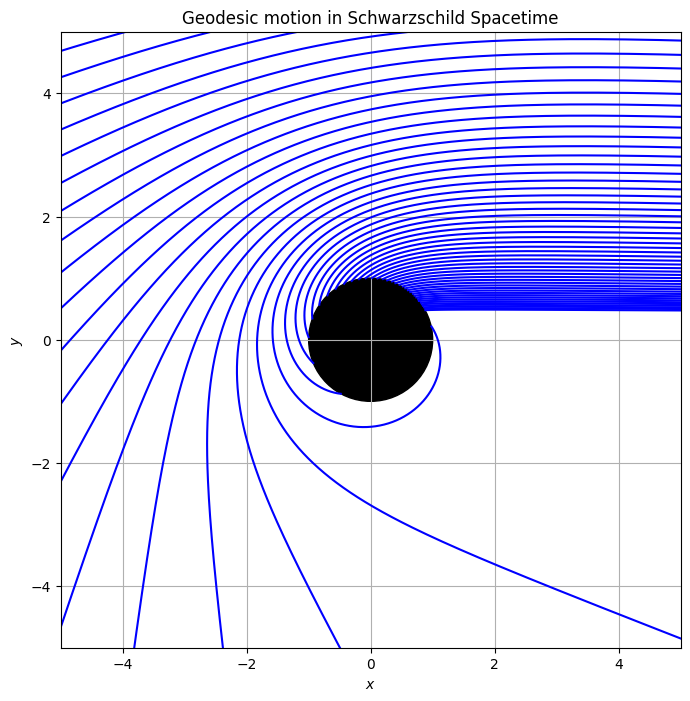

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Schwarzschild radius
rs = 1

def eh_crop(t,u):
    # crop at EH or divergence, and stop by erasing the derivative.
    if (u[0]>rs*3) or (u[0] < 1e-20):
        return [0,0]
    return [u[1], geodesic(u[0])]

def geodesic(u):
    return -u * (1 - (3/2) * rs * u)

# Range of initial conditions
r_initial = [100] #np.linspace(3, 10, 3)
du_0_values = np.geomspace(1e-4, 2, 200)  # Varying initial tangential velocities

phi_start = 0
phi_max = 4 * np.pi 

plt.figure(figsize=(8, 8))

# Create a circle with the desired radius, center at (0, 0), and filled in
circle = plt.Circle((0, 0), rs, color='black', label='Central Mass')

# Add the circle to the plot
plt.gca().add_artist(circle)

for r_0 in r_initial:
    for du_0 in du_0_values:
        u_0 = 1 / r_0  # u = 1/r
        initial_conditions = [u_0, du_0]
    
        solution = solve_ivp(
            eh_crop,
            [phi_start, phi_max],        # Start and end points
            initial_conditions,          # Initial conditions
            method='RK45',               # Runge-Kutta method with adaptive step sizes
            max_step=1e-2,                # Maximum step size to control resolution
            rtol=1e-6,                   # Relative tolerance for accuracy
            atol=1e-9                    # Absolute tolerance for accuracy
        )

        u_values = solution.y[0]
        r_values = 1 / u_values
    
        # Remove unphysical values (e.g., r <= rs)
        valid_indices = np.where(r_values >= 1)[0]

        # Find the first index where the condition does not hold
        first_invalid_index = np.argmax(r_values < 1)
        valid_indices = valid_indices[valid_indices < first_invalid_index]
        
        r_values = r_values[valid_indices]
        phi_values_filtered = solution.t[valid_indices]
    
        # Convert to Cartesian coordinates
        x_values = r_values * np.cos(phi_values_filtered)
        y_values = r_values * np.sin(phi_values_filtered)
    
        # Plot trajectory
        plt.plot(x_values, y_values, label=f'du_0 = {du_0:.01f}', color='blue')

# Plot settings
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Geodesic motion in Schwarzschild Spacetime')
plt.grid()

# Set x and y axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()